# Import Library

In [1]:
#pip install scikit-learn

In [2]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

# Extraction of Resumes from the Directory

In [3]:
os.listdir('D:\excelr_project\Resumes')

['Peoplesoft resumes',
 'React JS Developer',
 'SQL Developer Lightning insight',
 'workday resumes']

#### Peoplesoft Resumes

In [4]:
file_path1 = []
category1  = []
directory1 = 'D:\excelr_project\Resumes\Peoplesoft resumes'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [5]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft
3,Classification: Internal\n\nClassification: In...,PeopleSoft
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
6,PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...,PeopleSoft
7,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
8,Vinod Akkala ...,PeopleSoft
9,PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...,PeopleSoft


#### React JS Developers Resumes

In [6]:
file_path2 = []
category2  = []
directory2 = 'D:\excelr_project\Resumes\React JS Developer'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [7]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,Name: Ravali P \n\n\n\n ...,React JS Developer
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
6,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer


#### SQL Developers Resume

In [8]:
file_path3 = []
category3  = []
directory3 = 'D:\excelr_project\Resumes\SQL Developer Lightning insight'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [9]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4, Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...,SQL Developer
5,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
6,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
7,SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L ...,SQL Developer
8,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer


#### Workday Resumes

In [10]:
file_path4 = []
category4  = []
directory4 = 'D:\excelr_project\Resumes\workday resumes'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [11]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
1,Name : Gopi Krishna Reddy\n\n\t\t ...,Workday
2,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,Workday
3,Harikrishna Akula ...,Workday
4,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,Workday
5,G Himaja\n\n ...,Workday
6,Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...,Workday
7,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
8,Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...,Workday
9,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday


## Create a DataFrame

In [12]:
resume_data = pd.concat([data1, data2, data3, data4], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft,NaN,NaN,NaN
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft,NaN,NaN,NaN
3,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft,NaN,NaN,NaN
...,...,...,...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Workday
75,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Workday


### Merge all Unnecessary column in One Column

In [13]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft,NaN,NaN,NaN,PeopleSoft
...,...,...,...,...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Workday,Workday
75,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday,Workday
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday,Workday
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Workday,Workday


In [14]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

### Final Dataset

In [15]:
resume_data.head(15)

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...
3,PeopleSoft,Classification: Internal\n\nClassification: In...
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \..."
5,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
6,PeopleSoft,PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...
7,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
8,PeopleSoft,Vinod Akkala ...
9,PeopleSoft,PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...


In [16]:
resume_data["Raw_Details"][4]

'Priyanka Ramadoss\n\n\t61/46, MountPleasant, \n\n\tCoonoor\n\n\tThe Nilgiris- 643102                                                                                            \n\n\t\n\nCareer Objective\n\n\n\nTo excel as a software professional by working in a learning and challenging environment and utilize the skills and knowledge through diligence, dedication and ensure maximum contribution to the growth of the organization I work for.\n\n\t\n\nProfile Summary\n\n\n\nAn Adept IT professional with 4.11 years (September 2016 - present) of experience as Peoplesoft Admin with Accenture\n\n\t\n\nProfessional Summary\n\n\n\nPeopleSoft Administrator (September 2016-Present)\n\n\n\nExperience in PeopleSoft Administration for Finance application.\n\nProficient in creating and configuring PeopleSoft components like Web server, Application server and process schedulers.\n\nActive monitoring in Non production databases and applications.\n\nKnowledgeable on PeopleSoft migrations using applicat

### Save new CSV File

In [17]:
resume_data.to_csv('Raw_Resume.csv', index=False)

## EDA & Data Understanding

In [18]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...
3,PeopleSoft,Classification: Internal\n\nClassification: In...
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \..."
...,...,...
74,Workday,Workday Integration Consultant\n\n\n\nName ...
75,Workday,Srikanth (WORKDAY hCM Consultant)\t ...
76,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
77,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


In [19]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

## Number of Words in each Resume

In [20]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1008
1,G. Ananda Rayudu \n\n\t\t https://www.li...,1451
2,PeopleSoft Database Administrator\n\n ...,1346
3,Classification: Internal\n\nClassification: In...,558
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",667


### Number of Characters

In [21]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,7792
1,G. Ananda Rayudu \n\n\t\t https://www.li...,8394
2,PeopleSoft Database Administrator\n\n ...,6900
3,Classification: Internal\n\nClassification: In...,4917
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",5196


### Number of Stopwords

In [22]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
1,G. Ananda Rayudu \n\n\t\t https://www.li...,186
2,PeopleSoft Database Administrator\n\n ...,177
3,Classification: Internal\n\nClassification: In...,114
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",123


### Number of Numerics

In [23]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
1,G. Ananda Rayudu \n\n\t\t https://www.li...,6
2,PeopleSoft Database Administrator\n\n ...,4
3,Classification: Internal\n\nClassification: In...,7
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",7


In [24]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1008,7792,190,4
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...,1451,8394,186,6
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...,1346,6900,177,4
3,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",667,5196,123,7
...,...,...,...,...,...,...
74,Workday,Workday Integration Consultant\n\n\n\nName ...,904,7030,197,3
75,Workday,Srikanth (WORKDAY hCM Consultant)\t ...,1063,6737,194,9
76,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,1076,8329,236,6
77,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,1035,6933,193,7


## Text Pre-Processing

### Using Regular Expression

In [25]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [26]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

### Clean Text from Resume

In [27]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...,ananda rayudu ananda rayudu profile summary ye...
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,Workday,Workday Integration Consultant\n\n\n\nName ...,workday integration consultant name sri krishn...
75,Workday,Srikanth (WORKDAY hCM Consultant)\t ...,srikanth workday hcm consultant seeking suitab...
76,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday hcm fcm name kumar role workday consul...
77,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,venkateswarlu workday consultant professional ...


## Save the Clean Data in new CSV File

In [28]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu ananda rayudu profile summary ye...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,srikanth workday hcm consultant seeking suitab...
76,Workday,workday hcm fcm name kumar role workday consul...
77,Workday,venkateswarlu workday consultant professional ...


In [29]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [30]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu ananda rayudu profile summary ye...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,srikanth workday hcm consultant seeking suitab...
76,Workday,workday hcm fcm name kumar role workday consul...
77,Workday,venkateswarlu workday consultant professional ...


In [31]:
resume_data.Resume_Details[5]

'sirazuddin bangalore india sirazuddin bangalore india profile summary overall years experience peoplesoft administrator installed peopletools scratch including products experience peopletools application hrms fscm deterministic approach towards problem solving troubleshooting proficient integration broker upgraded fscm hcm applications peopletools peopletools education graduated tech electronics communication engg college engineering vizianagaram jntuk aggregate achieved marks standard scored standard achievements awarded bravo pat back techahindra awarded associate month award innovator month time awarded spot pat back capgemini work experience capgemini may till production support finance environment respective non production environments project experience project name axa role consultant environment windows server cognizant technol ogy sol ions augus april voya financial insurance client project deals support managing finance applications project experience project name voya finan

### Tokenization

In [32]:
import nltk
nltk.download('punkt')
resume_data['Tokenized_Resumes'] = resume_data['Resume_Details'].apply(lambda x: nltk.word_tokenize(x))
resume_data.head(10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91901\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Category,Resume_Details,Tokenized_Resumes
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,"[anubhav, kumar, singh, core, competencies, sc..."
1,PeopleSoft,ananda rayudu ananda rayudu profile summary ye...,"[ananda, rayudu, ananda, rayudu, profile, summ..."
2,PeopleSoft,peoplesoft database administrator gangareddy p...,"[peoplesoft, database, administrator, gangared..."
3,PeopleSoft,classification internal classification interna...,"[classification, internal, classification, int..."
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,"[priyanka, ramadoss, mountpleasant, coonoor, n..."
5,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,"[sirazuddin, bangalore, india, sirazuddin, ban..."
6,PeopleSoft,peoplesoft administrator srinivas experience s...,"[peoplesoft, administrator, srinivas, experien..."
7,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,"[peoplesoft, admin, varkala, vikas, career, ob..."
8,PeopleSoft,vinod akkala peoplesoft dba admin professional...,"[vinod, akkala, peoplesoft, dba, admin, profes..."
9,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...,"[peoplesoft, admin, peoplesoft, dba, ganesh, a..."


In [33]:
resume_data.drop(['Tokenized_Resumes'],axis=1,inplace=True)

### Stopwords removal

In [34]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

cleaned_resumes = []

for index, row in resume_data.iterrows():

    words_without_stopwords = [word for word in row.Resume_Details.split()]

    cleaned_resumes.append(' '.join(words_without_stopwords))

resume_data['Final_Clean_Resumes'] = cleaned_resumes
resume_data.head(10)

,Category,Resume_Details,Final_Clean_Resumes
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu ananda rayudu profile summary ye...,ananda rayudu ananda rayudu profile summary ye...
2,PeopleSoft,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...
5,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...
6,PeopleSoft,peoplesoft administrator srinivas experience s...,peoplesoft administrator srinivas experience s...
7,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
8,PeopleSoft,vinod akkala peoplesoft dba admin professional...,vinod akkala peoplesoft dba admin professional...
9,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...


In [35]:
Tokenized_Resume = resume_data['Final_Clean_Resumes'].apply(lambda x: x.split())
Tokenized_Resume.head(10)

0    [anubhav, kumar, singh, core, competencies, sc...
1    [ananda, rayudu, ananda, rayudu, profile, summ...
2    [peoplesoft, database, administrator, gangared...
3    [classification, internal, classification, int...
4    [priyanka, ramadoss, mountpleasant, coonoor, n...
5    [sirazuddin, bangalore, india, sirazuddin, ban...
6    [peoplesoft, administrator, srinivas, experien...
7    [peoplesoft, admin, varkala, vikas, career, ob...
8    [vinod, akkala, peoplesoft, dba, admin, profes...
9    [peoplesoft, admin, peoplesoft, dba, ganesh, a...
Name: Final_Clean_Resumes, dtype: object

### Lemmatization

In [36]:
import nltk
nltk.download('wordnet')
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

Tokenized_Resumes = Tokenized_Resume.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
Tokenized_Resumes.head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91901\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91901\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    [anubhav, kumar, singh, core, competency, scri...
1    [ananda, rayudu, ananda, rayudu, profile, summ...
2    [peoplesoft, database, administrator, gangared...
3    [classification, internal, classification, int...
4    [priyanka, ramadoss, mountpleasant, coonoor, n...
5    [sirazuddin, bangalore, india, sirazuddin, ban...
6    [peoplesoft, administrator, srinivas, experien...
7    [peoplesoft, admin, varkala, vikas, career, ob...
8    [vinod, akkala, peoplesoft, dba, admin, profes...
9    [peoplesoft, admin, peoplesoft, dba, ganesh, a...
Name: Final_Clean_Resumes, dtype: object

In [37]:
for i, tokens in enumerate(Tokenized_Resume):
    Tokenized_Resume[i] = ' '.join(tokens)

resume_data['Final_Clean_Resumes'] = Tokenized_Resume
resume_data.head(10)

,Category,Resume_Details,Final_Clean_Resumes
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu ananda rayudu profile summary ye...,ananda rayudu ananda rayudu profile summary ye...
2,PeopleSoft,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...
5,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...
6,PeopleSoft,peoplesoft administrator srinivas experience s...,peoplesoft administrator srinivas experience s...
7,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
8,PeopleSoft,vinod akkala peoplesoft dba admin professional...,vinod akkala peoplesoft dba admin professional...
9,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...


## Named Entity Recognition (NER)

In [38]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Final_Clean_Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 600), ('peoplesoft', 452), ('workday', 432), ('application', 417), ('using', 395), ('server', 360), ('data', 332), ('project', 327), ('reports', 326), ('sql', 281), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 191), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 181), ('like', 180), ('support', 178), ('skills', 173), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('technical', 164), ('working', 162), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 151), ('testing', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('role', 142), ('oracle', 141), ('developer', 141), ('environment', 139), ('management', 136), ('security', 134), ('eib', 134), ('production', 133)]


## Parts Of Speech (POS) Tagging

In [106]:
#!python -m spacy download en_core_web_lg

Defaulting to user installation because normal site-packages is not writeable

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Program Files\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Program Files\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\socket.py", line 707, in readinto
    return self._sock.recv_into(b)



     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     -------------------------------------- 0.0/587.7 MB 109.5 kB/s eta 1:29:26
     -------------------------------------- 0.1/587.7 MB 234.9 kB/s eta 0:41:43
     -------------------------------------- 0.2/587.7 MB 579.6 kB/s eta 0:16:54
     ---------------------------------------- 0.4/587.7 MB 1.1 MB/s eta 0:08:32
     ---------------------------------------- 0.7/587.7 MB 1.8 MB/s eta 0:05:27
     ---------------------------------------- 1.1/587.7 MB 2.7 MB/s eta 0:03:38
     ---------------------------------------- 1.5/587.7 MB 3.3 MB/s eta 0:02:58
     ---------------------------------------- 1.5/587.7 MB 3.3 MB/s eta 0:

In [108]:
#nlp = spacy.load('en_core_web_lg')

#one_block = cleanedSentences[1300:5200]
#doc_block = nlp(one_block)
#spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

OSError: [E050] Can't find model 'en_core_web_lg'. It doesn't seem to be a Python package or a valid path to a data directory.

#### Count Vectoriser

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
review_cv=cv.fit_transform(resume_data["Final_Clean_Resumes"])

In [42]:
print(cv.get_feature_names_out()[100:2000])

['aggregator' 'agile' 'agility' ... 'inter' 'interact' 'interacting']


In [43]:
print(review_cv.toarray().shape)

(79, 4437)


In [44]:
resume_data

,Category,Resume_Details,Final_Clean_Resumes
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu ananda rayudu profile summary ye...,ananda rayudu ananda rayudu profile summary ye...
2,PeopleSoft,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,Workday,workday integration consultant name sri krishn...,workday integration consultant name sri krishn...
75,Workday,srikanth workday hcm consultant seeking suitab...,srikanth workday hcm consultant seeking suitab...
76,Workday,workday hcm fcm name kumar role workday consul...,workday hcm fcm name kumar role workday consul...
77,Workday,venkateswarlu workday consultant professional ...,venkateswarlu workday consultant professional ...


In [45]:
resume_data.drop(['Resume_Details'],axis=1,inplace=True)
resume_data

,Category,Final_Clean_Resumes
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu ananda rayudu profile summary ye...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,srikanth workday hcm consultant seeking suitab...
76,Workday,workday hcm fcm name kumar role workday consul...
77,Workday,venkateswarlu workday consultant professional ...


In [46]:
resume_data.Category.value_counts()

Category
React JS Developer    24
Workday               21
PeopleSoft            20
SQL Developer         14
Name: count, dtype: int64

#### Resume Categories

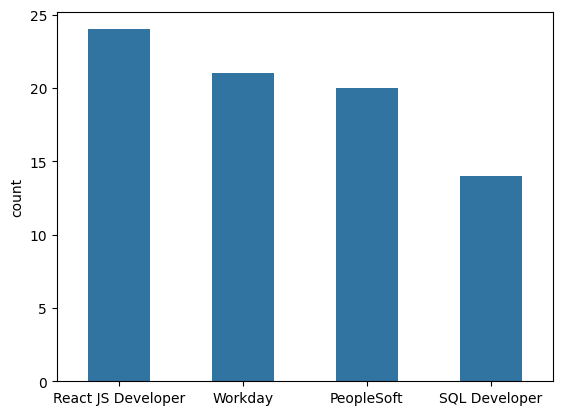

In [47]:
category_counts = resume_data['Category'].value_counts()

ax = sns.barplot(x=list(category_counts.index),y=category_counts,width=0.5)

# N-grams

#### N-grams analyses are often used to see which words often show up together.

In [48]:
#pip install textblob

In [49]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91901\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
TextBlob(resume_data['Final_Clean_Resumes'][1]).ngrams(2)[:20]

[WordList(['ananda', 'rayudu']),
 WordList(['rayudu', 'ananda']),
 WordList(['ananda', 'rayudu']),
 WordList(['rayudu', 'profile']),
 WordList(['profile', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'implementing']),
 WordList(['implementing', 'upgrading']),
 WordList(['upgrading', 'supporting']),
 WordList(['supporting', 'peoplesoft']),
 WordList(['peoplesoft', 'database']),
 WordList(['database', 'administration']),
 WordList(['administration', 'including']),
 WordList(['including', 'human']),
 WordList(['human', 'capital']),
 WordList(['capital', 'management']),
 WordList(['management', 'hcm']),
 WordList(['hcm', 'financials']),
 WordList(['financials', 'campus'])]

### Using the Word Clowds

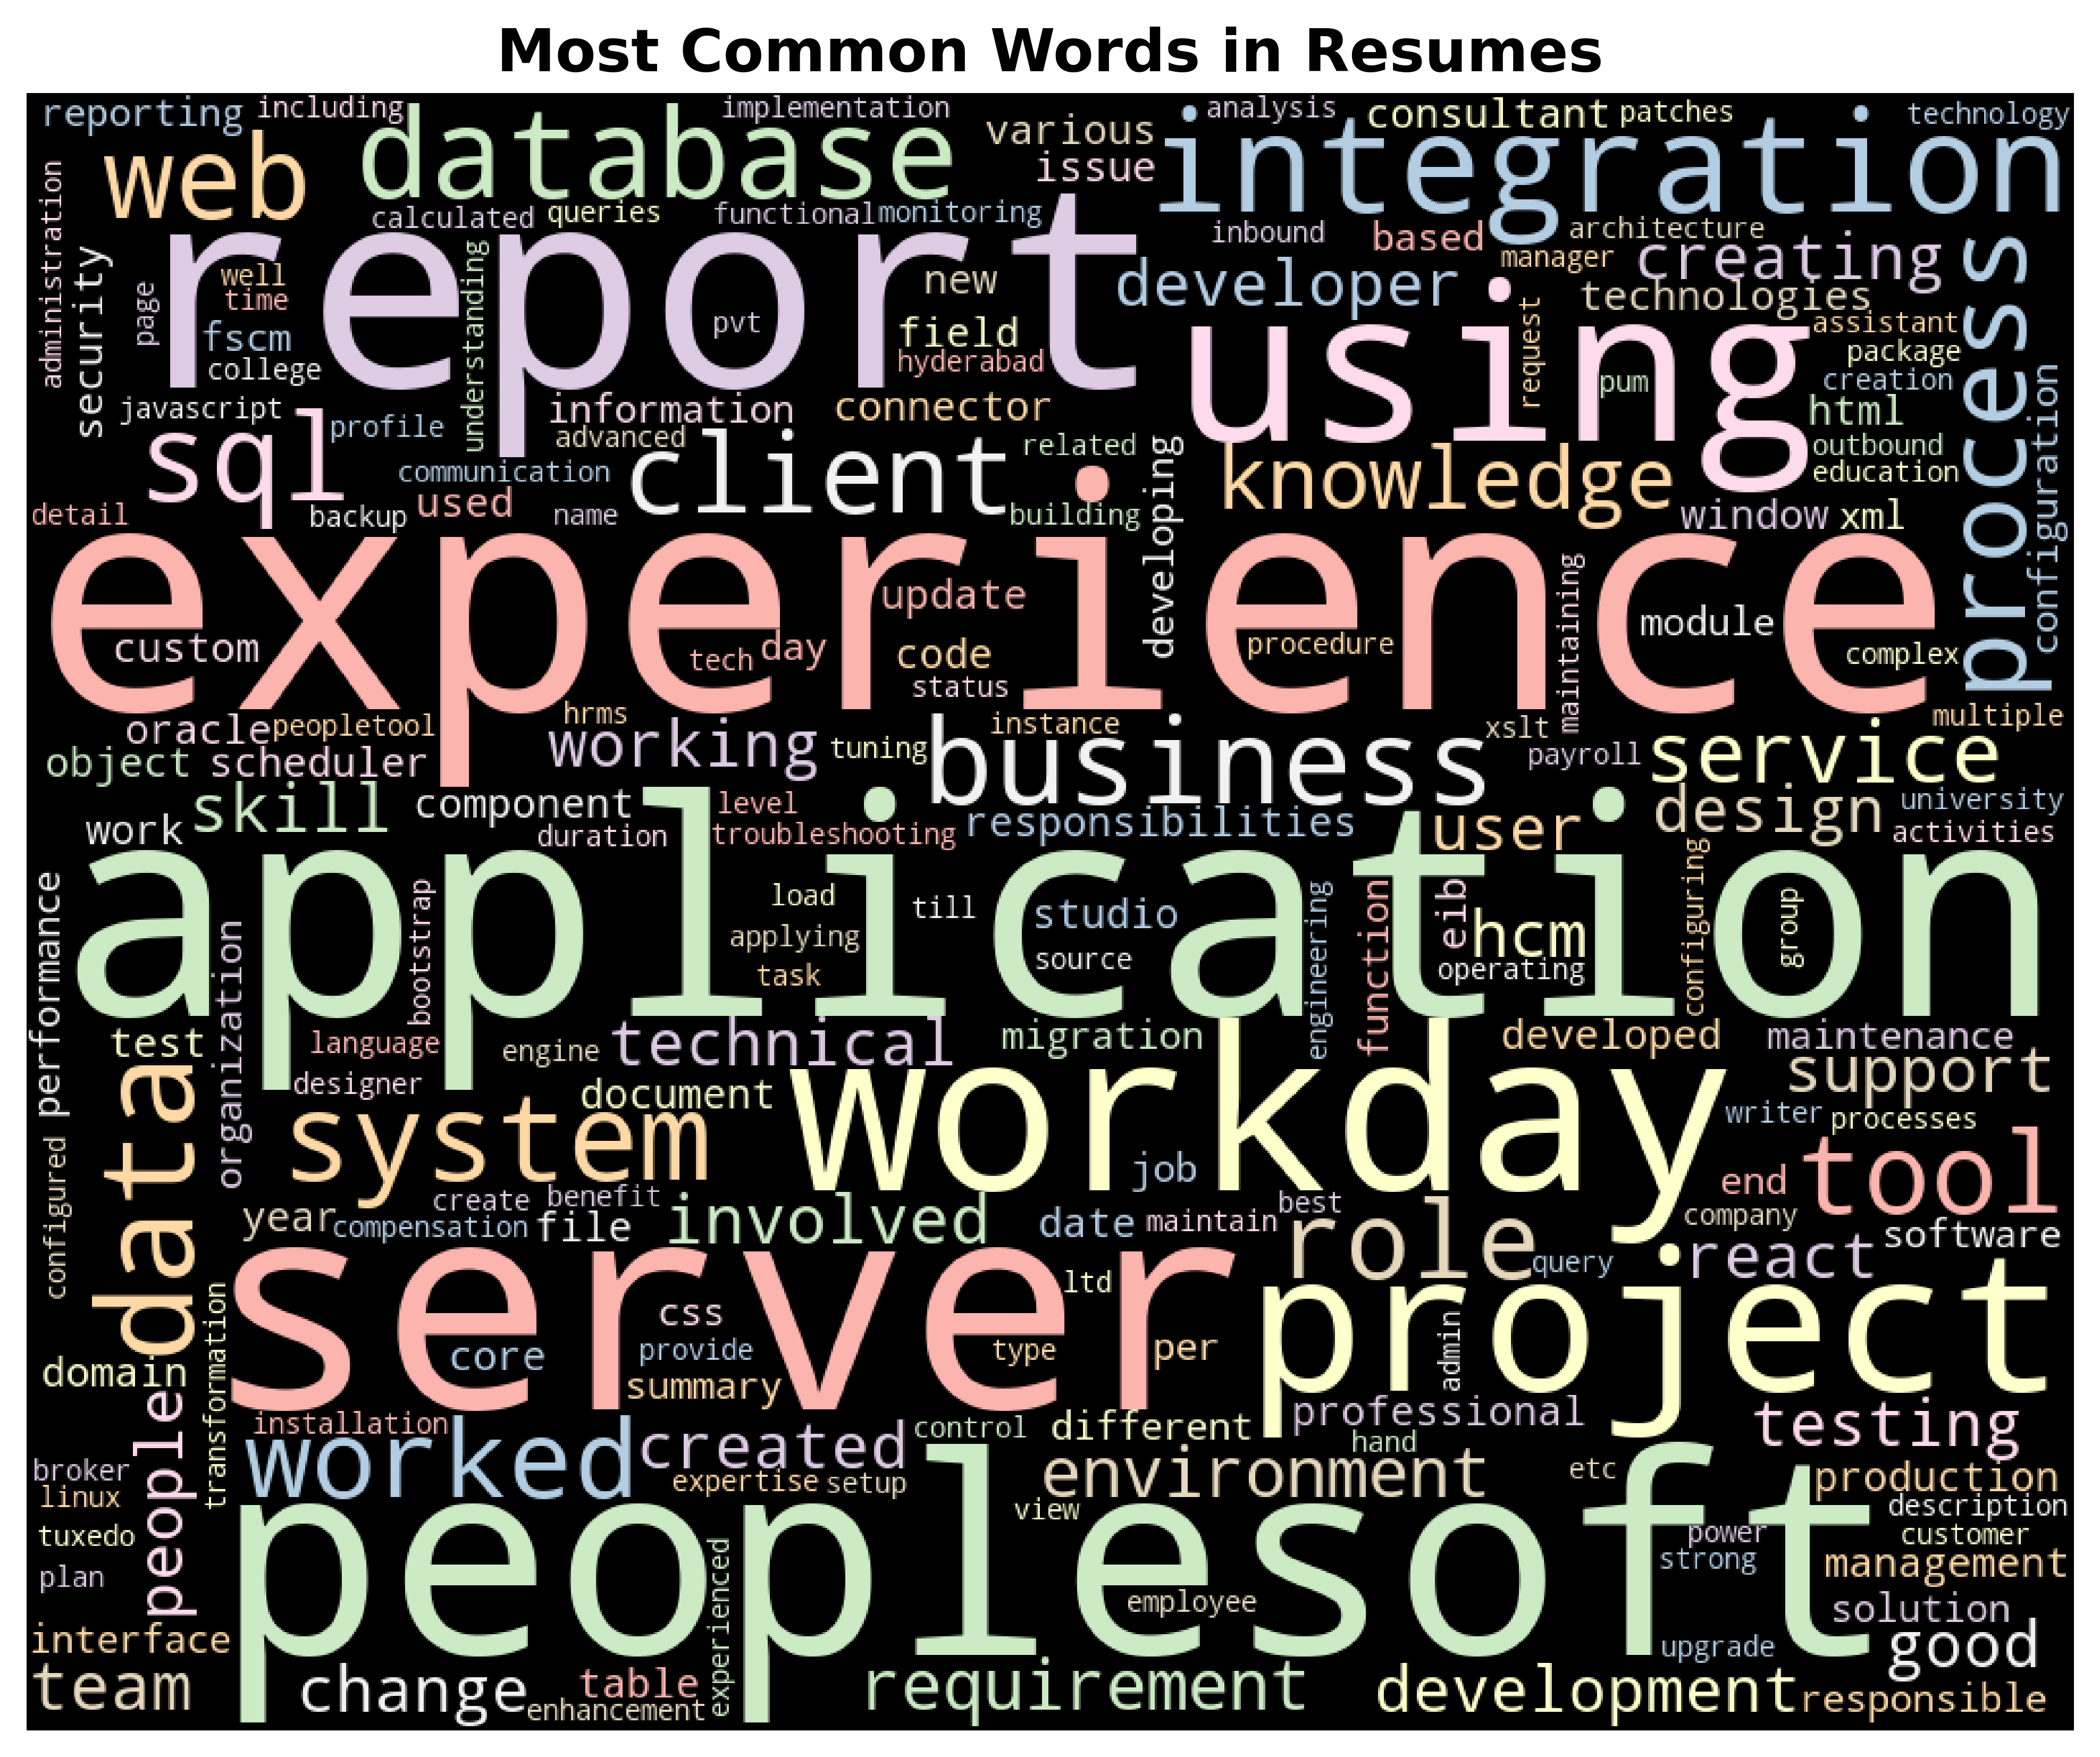

In [51]:
text = " ".join(cat for cat in resume_data.Final_Clean_Resumes) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# Model Construction and Evaluation

### Split data for training and testing

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
requiredText = resume_data['Final_Clean_Resumes'].values
requiredTarget = resume_data['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=45, test_size=0.20,stratify=requiredTarget)
X_train.shape, X_test.shape

((63, 4348), (16, 4348))

## Model Building

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [56]:
predict1 = lg.predict(X_test)

In [57]:
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
accuracy_1 = accuracy_score(y_test,predict1)
accuracy_1

0.9375

In [58]:
cm = confusion_matrix(y_test,predict1)
cm

array([[3, 1, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

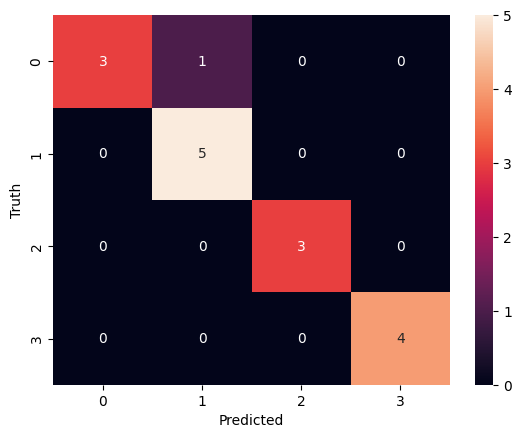

In [59]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict1))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.75      0.86         4
React JS Developer       0.83      1.00      0.91         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         4

          accuracy                           0.94        16
         macro avg       0.96      0.94      0.94        16
      weighted avg       0.95      0.94      0.94        16



In [61]:
accuracy_1 = round(accuracy_score(y_test,predict1),4)
precision_1 = round(precision_score(y_test,predict1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,predict1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,predict1, average = 'macro'),4)

In [62]:
print('Accuracy Score  : ', accuracy_1)
print('Precision Score : ', precision_1)
print('Recall Score    : ', recall_1)
print('f1-Score        : ', f1_1)

Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9375
f1-Score        :  0.9416


# Naive-Bayes Classifier

In [63]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)
predict2=nb.predict(X_test)

In [64]:
accuracy_2 = accuracy_score(y_test,predict2)
accuracy_2

0.875

In [65]:
cm2=confusion_matrix(y_test,predict2)
cm2

array([[3, 0, 0, 1],
       [0, 5, 0, 0],
       [0, 0, 2, 1],
       [0, 0, 0, 4]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

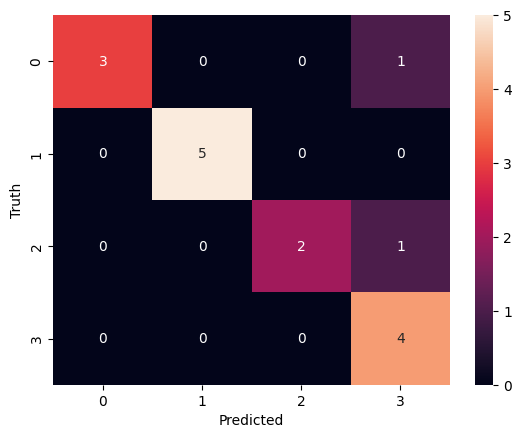

In [66]:
sns.heatmap(cm2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [67]:
print(classification_report(y_test,predict2))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.75      0.86         4
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      0.67      0.80         3
           Workday       0.67      1.00      0.80         4

          accuracy                           0.88        16
         macro avg       0.92      0.85      0.86        16
      weighted avg       0.92      0.88      0.88        16



In [68]:
accuracy_2 = round(accuracy_score(y_test,predict2),4)
precision_2 = round(precision_score(y_test,predict2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,predict2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,predict2, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_2)
print('Precision Score : ', precision_2)
print('Recall Score    : ', recall_2)
print('f1-Score        : ', f1_2)

Accuracy Score  :  0.875
Precision Score :  0.9167
Recall Score    :  0.8542
f1-Score        :  0.8643


# Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
predict3=dt.predict(X_test)

In [70]:
accuracy_3 = accuracy_score(y_test,predict3)
accuracy_3

1.0

In [71]:
cm3=confusion_matrix(y_test,predict3)
cm3

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

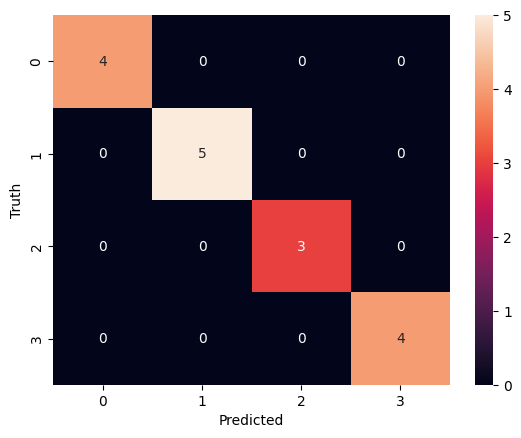

In [72]:
sns.heatmap(cm3,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [73]:
print(classification_report(y_test,predict3))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         4

          accuracy                           1.00        16
         macro avg       1.00      1.00      1.00        16
      weighted avg       1.00      1.00      1.00        16



In [74]:
accuracy_3 = round(accuracy_score(y_test,predict3),4)
precision_3 = round(precision_score(y_test,predict3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,predict3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,predict3, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


# Support Vector Machine Classifier

In [75]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)
predict4 = sv.predict(X_test)

In [76]:
accuracy_4 = accuracy_score(y_test,predict4)
accuracy_4

0.9375

In [77]:
cm4 = confusion_matrix(y_test,predict4)
cm4

array([[3, 1, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

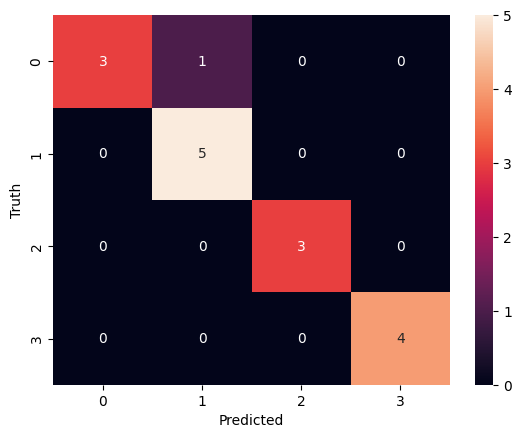

In [78]:
sns.heatmap(cm4,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [79]:
print(classification_report(y_test,predict4))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.75      0.86         4
React JS Developer       0.83      1.00      0.91         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         4

          accuracy                           0.94        16
         macro avg       0.96      0.94      0.94        16
      weighted avg       0.95      0.94      0.94        16



In [80]:
accuracy_4 = round(accuracy_score(y_test,predict4),4)
precision_4 = round(precision_score(y_test,predict4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,predict4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,predict4, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)


Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9375
f1-Score        :  0.9416


# Random forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict5=rf.predict(X_test)

In [82]:
accuracy_5 = accuracy_score(y_test,predict5)
accuracy_5

1.0

In [83]:
cm5=confusion_matrix(y_test,predict5)
cm5

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

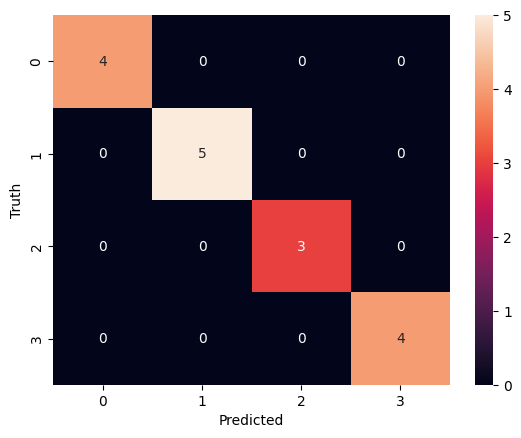

In [84]:
sns.heatmap(cm5,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [85]:
print(classification_report(y_test,predict5))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         4

          accuracy                           1.00        16
         macro avg       1.00      1.00      1.00        16
      weighted avg       1.00      1.00      1.00        16



In [86]:
accuracy_5 = round(accuracy_score(y_test,predict5),4)
precision_5 = round(precision_score(y_test,predict5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,predict5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,predict5, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


# AdaBoost classifie

In [87]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [88]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
predict6=ab.predict(X_test)

In [89]:
accuracy_6 = accuracy_score(y_test,predict6)
accuracy_6

0.6875

In [90]:
cm6 = confusion_matrix(y_test,predict6)
cm6

array([[0, 4, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

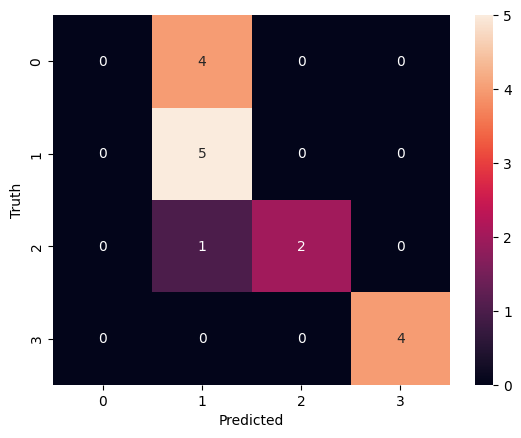

In [91]:
sns.heatmap(cm6,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [92]:
print(classification_report(y_test,predict6))

                    precision    recall  f1-score   support

        PeopleSoft       0.00      0.00      0.00         4
React JS Developer       0.50      1.00      0.67         5
     SQL Developer       1.00      0.67      0.80         3
           Workday       1.00      1.00      1.00         4

          accuracy                           0.69        16
         macro avg       0.62      0.67      0.62        16
      weighted avg       0.59      0.69      0.61        16



In [93]:
accuracy_6 = round(accuracy_score(y_test,predict6),4)
precision_6 = round(precision_score(y_test,predict6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,predict6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,predict6, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)

Accuracy Score  :  0.6875
Precision Score :  0.625
Recall Score    :  0.6667
f1-Score        :  0.6167


# Gradient Boosting

In [94]:
gd = GradientBoostingClassifier()
gd.fit(X_train,y_train)
predict7 = gd.predict(X_test)

In [95]:
accuracy_7 = accuracy_score(y_test,predict7)
accuracy_7

1.0

In [96]:
cm7 = confusion_matrix(y_test,predict7)
cm7

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

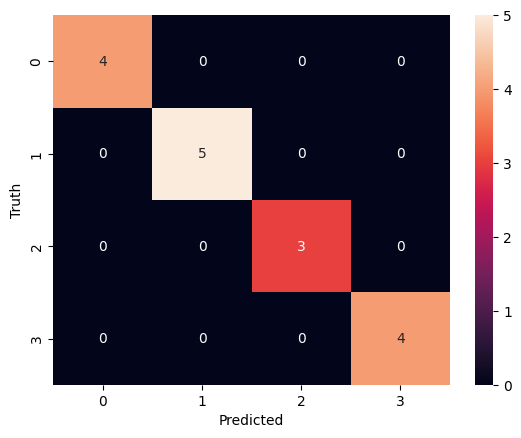

In [97]:
sns.heatmap(cm7,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [98]:
print(classification_report(y_test,predict7))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         4

          accuracy                           1.00        16
         macro avg       1.00      1.00      1.00        16
      weighted avg       1.00      1.00      1.00        16



In [99]:
accuracy_7 = round(accuracy_score(y_test,predict7),4)
precision_7 = round(precision_score(y_test,predict7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,predict7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,predict7, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


#### Conclusion Table

In [100]:
table = {'Classifier' : ['Logistic Regression','Naive-Bayes Classifier','Decision Tree Classifier','SVC Classifier','Random tree classifier','AdaBoost Classifier', 'Gradient Boosting Classifier'], 'Accuracy' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7], 'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7], 'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7], 'F1_Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7]}
table = pd.DataFrame(table)
table.sort_values(["Accuracy"],inplace = True, ignore_index=True)
table

,Classifier,Accuracy,Precision Score,Recall Score,F1_Score
0,AdaBoost Classifier,0.6875,0.6250,0.6667,0.6167
1,Naive-Bayes Classifier,0.8750,0.9167,0.8542,0.8643
2,Logistic Regression,0.9375,0.9583,0.9375,0.9416
3,SVC Classifier,0.9375,0.9583,0.9375,0.9416
4,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000
5,Random tree classifier,1.0000,1.0000,1.0000,1.0000
6,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000


# Model deployment

In [101]:
#!pip install PyPDF2
#!pip install streamlit
#!pip install textract
#!pip install python-docx
#!pip install scikit-learn
#!pip install pdfplumber
#!pip install pdf2docx
#!pip install python-docx

In [102]:
import pickle
filename = 'RF_model.pkl'
pickle.dump(rf,open(filename,'wb'))

In [103]:
filename = 'vector.pkl'
pickle.dump(word_vectorizer,open(filename,'wb'))

In [104]:
%%writefile app.py
# IMPORT LIBRARIES
import re
import PyPDF2
import docx2txt
import pdfplumber
import pandas as pd
import streamlit as st

import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

#----------------------------------------------------------------------------------------------------

st.title('RESUME CLASSIFICATION')
st.markdown('<style>h1{color: Purple;}</style>', unsafe_allow_html=True)
st.subheader('Welcome to Resume Classification App')

# FUNCTIONS
def extract_skills(resume_text):
    nlp_text = nlp(resume_text)
    noun_chunks = nlp_text.noun_chunks
    tokens = [token.text for token in nlp_text if not token.is_stop] # removing stop words and implementing word tokenization

    data = pd.read_csv(r"skills.csv") # reading the csv file
    skills = list(data.columns.values) # extract values
    skillset = []

    for token in tokens: # check for one-grams (example: python)
        if token.lower() in skills:
            skillset.append(token)

    for token in noun_chunks: # check for bi-grams and tri-grams (example: machine learning)
        token = token.text.lower().strip()
        if token in skills:
            skillset.append(token)
    return [i.capitalize() for i in set([i.lower() for i in skillset])]

def getText(filename):
    fullText = '' # Create empty string
    if filename.type == "application/vnd.openxmlformats-officedocument.wordprocessingml.document":
        doc = docx2txt.process(filename)
        for para in doc:
            fullText = fullText + para
    else:
        with pdfplumber.open(filename) as pdf_file:
            pdoc = PyPDF2.PdfFileReader(filename)
            number_of_pages = pdoc.getNumPages()
            page = pdoc.pages[0]
            page_content = page.extractText()
        for paragraph in page_content:
            fullText =  fullText + paragraph
    return (fullText)

def display(doc_file):
    resume = []
    if doc_file.type == "application/vnd.openxmlformats-officedocument.wordprocessingml.document":
        resume.append(docx2txt.process(doc_file))
    else:
        with pdfplumber.open(doc_file) as pdf:
            pages=pdf.pages[0]
            resume.append(pages.extract_text())
    return resume

def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)

file_type=pd.DataFrame([], columns=['Uploaded File',  'Predicted Profile','Skills',])
filename = []
predicted = []
skills = []

#-------------------------------------------------------------------------------------------------
# MAIN CODE
import pickle as pk
model = pk.load(open(r'RF_model.pkl', 'rb'))
Vectorizer = pk.load(open(r'vector.pkl', 'rb'))

upload_file = st.file_uploader('Upload Your Resumes', type= ['docx','pdf'],accept_multiple_files=True)

for doc_file in upload_file:
    if doc_file is not None:
        filename.append(doc_file.name)
        cleaned = preprocess(display(doc_file))
        prediction = model.predict(Vectorizer.transform([cleaned]))[0]
        predicted.append(prediction)
        extText = getText(doc_file)
        skills.append(extract_skills(extText))

if len(predicted) > 0:
    file_type['Uploaded File'] = filename
    file_type['Skills'] = skills
    file_type['Predicted Profile'] = predicted
    st.table(file_type.style.format())

select = ['PeopleSoft','SQL Developer','React JS Developer','Workday']
st.subheader('Select as per Requirement')
option = st.selectbox('Fields',select)

if option == 'PeopleSoft':
    st.table(file_type[file_type['Predicted Profile'] == 'PeopleSoft'])
elif option == 'SQL Developer':
    st.table(file_type[file_type['Predicted Profile'] == 'SQL Developer'])
elif option == 'React JS Developer':
    st.table(file_type[file_type['Predicted Profile'] == 'React JS Developer'])
elif option == 'Workday':
    st.table(file_type[file_type['Predicted Profile'] == 'Workday'])

Overwriting app.py


In [105]:
#pip install streamlit

In [111]:
!streamlit run app.py

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\91901\AppData\Roaming\Python\Python312\Scripts\streamlit.exe\__main__.py", line 4, in <module>
  File "C:\Users\91901\AppData\Roaming\Python\Python312\site-packages\streamlit\__init__.py", line 56, in <module>
    from streamlit.delta_generator import DeltaGenerator as _DeltaGenerator
  File "C:\Users\91901\AppData\Roaming\Python\Python312\site-packages\streamlit\delta_generator.py", line 37, in <module>
    from streamlit import config, cursor, env_util, logger, runtime, type_util, util
  File "C:\Users\91901\AppData\Roaming\Python\Python312\site-packages\streamlit\cursor.py", line 18, in <module>
    from streamlit.runtime.scriptrunner import get_script_run_ctx
  File "C:\Users\91901\AppData\Roaming\Python\Python312\site-packages\streamlit\runtime\__init__.py", line 15, in <module>
    from streamlit.runtime.runtime import Runtim